## 워드 클라우드(WordCloud)
### 라이브러리 임포트

In [3]:
import nltk # 영문 자연어 처리를 위한 라이브러리
# 한글 자연어 처리를 위한 라이브러리 : konlpy (Java 개발 환경이 구축되어 있어야 함.)

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
import glob # 파일 처리 모듈
import re # 정규 표현식 모듈

from functools import reduce # 2차원 리스트를 1차원 리스트로 차원 축소 모듈
from collections import Counter # 데이터 집합에서 데이터 개수 count 모듈

from nltk.tokenize import word_tokenize # 단어 토큰화 모듈
from nltk.corpus import stopwords # 불용어 모듈
from nltk.stem import WordNetLemmatizer # 표제어 처리 모듈

from wordcloud import STOPWORDS, WordCloud # wordcloud  작성 모듈

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# glob.glob() 함수 :  원하는 디렉토리에 있는 해당 파일의 이름을 가져온다.
all_files = glob.glob('/content/drive/MyDrive/Colab Notebooks/AI_Class/data/myCabinetExcelData*.xls')
all_files

['/content/drive/MyDrive/Colab Notebooks/AI_Class/data/myCabinetExcelData.xls',
 '/content/drive/MyDrive/Colab Notebooks/AI_Class/data/myCabinetExcelData (1).xls',
 '/content/drive/MyDrive/Colab Notebooks/AI_Class/data/myCabinetExcelData (2).xls',
 '/content/drive/MyDrive/Colab Notebooks/AI_Class/data/myCabinetExcelData (3).xls',
 '/content/drive/MyDrive/Colab Notebooks/AI_Class/data/myCabinetExcelData (4).xls',
 '/content/drive/MyDrive/Colab Notebooks/AI_Class/data/myCabinetExcelData (5).xls',
 '/content/drive/MyDrive/Colab Notebooks/AI_Class/data/myCabinetExcelData (6).xls',
 '/content/drive/MyDrive/Colab Notebooks/AI_Class/data/myCabinetExcelData (7).xls',
 '/content/drive/MyDrive/Colab Notebooks/AI_Class/data/myCabinetExcelData (8).xls',
 '/content/drive/MyDrive/Colab Notebooks/AI_Class/data/myCabinetExcelData (9).xls']

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
# 엑셀 파일을 읽어서 데이터프레임 생성 후 리스트에 추가
all_files_data = []
for file in all_files:
    data_frame = pd.read_excel(file) # 데이터프레임 생성
    all_files_data.append(data_frame) # 생성된 데이터프레임 리스트에 추가

all_files_data[0].head() # 리스트 0번 인덱스 내용 출력

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Why Big Data = Big Deal,unknown,Mary Ann Leibert,2014
1,NaN,2,Correction to: Predictive Modeling with Big Da...,unknown,Mary Ann Leibert,2019
2,NaN,3,"Authors' Response to Gong's, “Comment on Data ...",unknown,Mary Ann Leibert,2014
3,NaN,4,Data Science and its Relationship to Big Data ...,unknown,Mary Ann Leibert,2013
4,NaN,5,Big-BOE: Fusing Spanish Official Gazette with ...,"Basanta-Val, P.; Sánchez-Fernández, L.",Mary Ann Leibert,2018


In [7]:
all_files_data_concat = pd.concat(all_files_data, axis = 0,
                                  ignore_index = True)
all_files_data_concat.head()

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Why Big Data = Big Deal,unknown,Mary Ann Leibert,2014
1,NaN,2,Correction to: Predictive Modeling with Big Da...,unknown,Mary Ann Leibert,2019
2,NaN,3,"Authors' Response to Gong's, “Comment on Data ...",unknown,Mary Ann Leibert,2014
3,NaN,4,Data Science and its Relationship to Big Data ...,unknown,Mary Ann Leibert,2013
4,NaN,5,Big-BOE: Fusing Spanish Official Gazette with ...,"Basanta-Val, P.; Sánchez-Fernández, L.",Mary Ann Leibert,2018


In [8]:
all_files_data_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   번호          1000 non-null   int64  
 2   제목          1000 non-null   object 
 3   저자          1000 non-null   object 
 4   출판사         1000 non-null   object 
 5   출판일         1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [9]:
all_title = all_files_data_concat['제목']
all_title.head()

0                              Why Big Data = Big Deal
1    Correction to: Predictive Modeling with Big Da...
2    Authors' Response to Gong's, “Comment on Data ...
3    Data Science and its Relationship to Big Data ...
4    Big-BOE: Fusing Spanish Official Gazette with ...
Name: 제목, dtype: object

In [10]:
stopWord = set(stopwords.words('english')) # 불용어(stopword) 사전 생성
lemma = WordNetLemmatizer()

In [15]:
words = []
for title in all_title:
    # 알파벳을 제외한 문제 제거( cleaning )
    EnWords = re.sub(r"[^a-zA-Z+]", " ", str(title))
    
    # 단어 토큰화 - cleaning된 문장을 정규화하여 단어 토근화
    EnWordsToken = word_tokenize(EnWords.lower())

    # 불용어(stopword) 처리
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWord]
    
    # 표제어(lemmatization) 처리
    EnWordTokenLemma = [ lemma.lemmatize(w) for w in EnWordsTokenStop]

    # 데이터 전처리가 끝난 결과를 리스트에 추가 - 단어 추가
    words.append(EnWordTokenLemma)

In [16]:
print(words)

[['big', 'data', 'big', 'deal'], ['correction', 'predictive', 'modeling', 'big', 'data', 'bigger', 'really', 'better', 'junqu', 'de', 'fortuny', 'e', 'marten', 'provost', 'f', 'big', 'data'], ['author', 'response', 'gong', 'comment', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making'], ['data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making'], ['big', 'boe', 'fusing', 'spanish', 'official', 'gazette', 'big', 'data', 'technology'], ['big', 'data', 'guide', 'understanding', 'climate', 'change', 'case', 'theory', 'guided', 'data', 'science'], ['thermal', 'aware', 'dvfs', 'enabled', 'big', 'data', 'task', 'scheduling', 'data', 'center'], ['reference', 'architecture', 'big', 'data', 'solution', 'introducing', 'model', 'perform', 'predictive', 'analytics', 'using', 'big', 'data', 'technology'], ['resting', 'state', 'fmri', 'functional', 'connectivity', 'big', 'data', 'preprocessing', 'pipeline', 'topological', 'data', 'an

In [17]:
words2 = list(reduce(lambda x, y : x+y, words))
print(words2)

['big', 'data', 'big', 'deal', 'correction', 'predictive', 'modeling', 'big', 'data', 'bigger', 'really', 'better', 'junqu', 'de', 'fortuny', 'e', 'marten', 'provost', 'f', 'big', 'data', 'author', 'response', 'gong', 'comment', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making', 'big', 'boe', 'fusing', 'spanish', 'official', 'gazette', 'big', 'data', 'technology', 'big', 'data', 'guide', 'understanding', 'climate', 'change', 'case', 'theory', 'guided', 'data', 'science', 'thermal', 'aware', 'dvfs', 'enabled', 'big', 'data', 'task', 'scheduling', 'data', 'center', 'reference', 'architecture', 'big', 'data', 'solution', 'introducing', 'model', 'perform', 'predictive', 'analytics', 'using', 'big', 'data', 'technology', 'resting', 'state', 'fmri', 'functional', 'connectivity', 'big', 'data', 'preprocessing', 'pipeline', 'topological', 'data', 'analysis', 'call', 

## 데이터 탐색 및 시각화(wordcloud)
### 데이터 탐색 - 단어 빈도수 계산

In [19]:
count = Counter(words2)
count

Counter({'big': 1328,
         'data': 1556,
         'deal': 18,
         'correction': 5,
         'predictive': 16,
         'modeling': 10,
         'bigger': 8,
         'really': 5,
         'better': 4,
         'junqu': 2,
         'de': 2,
         'fortuny': 2,
         'e': 8,
         'marten': 2,
         'provost': 2,
         'f': 4,
         'author': 4,
         'response': 4,
         'gong': 2,
         'comment': 2,
         'science': 48,
         'relationship': 5,
         'driven': 29,
         'decision': 21,
         'making': 20,
         'boe': 2,
         'fusing': 2,
         'spanish': 2,
         'official': 2,
         'gazette': 2,
         'technology': 23,
         'guide': 2,
         'understanding': 12,
         'climate': 6,
         'change': 13,
         'case': 10,
         'theory': 7,
         'guided': 2,
         'thermal': 2,
         'aware': 12,
         'dvfs': 2,
         'enabled': 6,
         'task': 4,
         'scheduling': 5,
   

In [20]:
word_count = dict()

# 단어 출현 횟수가 많은 상위 50개의 단어 추출 - 단 길이가 1이상인 단어만 추출
for tag, counts in count.most_common(50):
    if len(str(tag)) > 1:
        word_count[tag] = counts
        print(f'{tag} : {counts}')

data : 1556
big : 1328
analytics : 140
analysis : 72
based : 63
using : 55
science : 48
system : 48
challenge : 46
management : 46
approach : 44
model : 42
earth : 40
research : 36
mining : 35
learning : 35
health : 35
new : 34
cloud : 33
smart : 33
processing : 30
driven : 29
issue : 29
opportunity : 29
framework : 27
perspective : 25
technology : 23
information : 23
survey : 23
service : 23
review : 23
small : 23
business : 22
computing : 22
quality : 22
use : 22
decision : 21
efficient : 21
healthcare : 21
knowledge : 21
making : 20
privacy : 20
city : 19
application : 19
market : 19
deal : 18
care : 18
machine : 18
distributed : 18
platform : 18


## 데이터 탐색 - 막대 그래프로 시각화

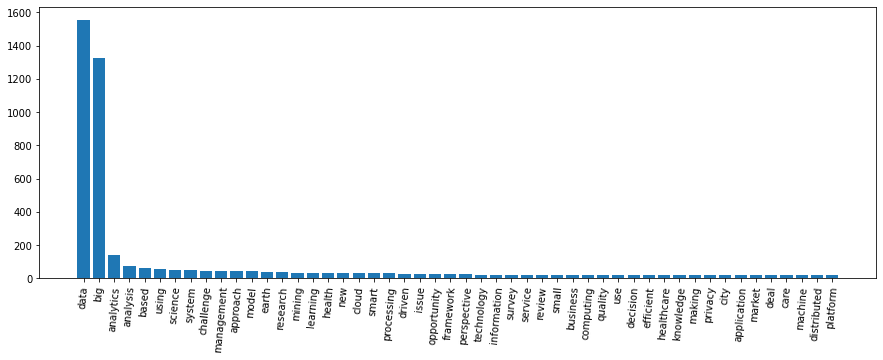

In [21]:
sorted_key = sorted(word_count, key=word_count.get, reverse=True)
sorted_values = sorted(word_count.values(), reverse=True)

plt.figure(figsize=(15,5))
plt.bar(range(len(word_count)), sorted_values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_key),
           rotation = '85')
plt.show()

## 워드클라우드(wordcloud)

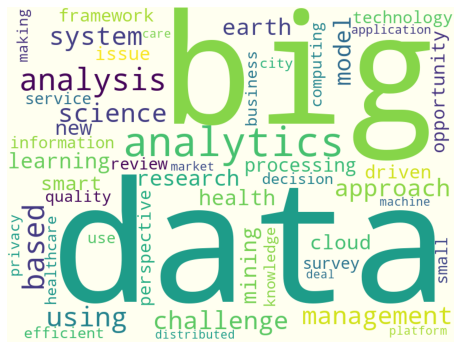

In [22]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='ivory', stopwords = stopwords,
               width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8, 8))
plt.imshow(cloud)
plt.axis('off')

plt.show()